In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
learning_rate = 0.01
training_epochs = 2000
display_step = 50

In [3]:
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779,
                      6.182, 7.59, 2.167, 7.042, 10.791, 5.313,
                      7.997, 5.654, 9.27, 3.1])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366,
                      2.596, 2.53, 1.221, 2.827, 3.465, 1.65,
                      2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

In [5]:
W = tf.Variable(np.random.randn(), name='weight')
b = tf.Variable(np.random.randn(), name='bias')

In [6]:
activation = tf.add(tf.multiply(X, W), b)

In [7]:
cost = tf.reduce_sum(tf.pow(activation - Y, 2)) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
init = tf.global_variables_initializer()

Epoch:    1, cost = 0.0075, W = -0.2331, b = 1.5192
Epoch:   51, cost = 0.0139, W = 0.1488, b = 1.5268
Epoch:  101, cost = 0.0129, W = 0.1548, b = 1.4837
Epoch:  151, cost = 0.0121, W = 0.1604, b = 1.4431
Epoch:  201, cost = 0.0113, W = 0.1657, b = 1.4049
Epoch:  251, cost = 0.0105, W = 0.1707, b = 1.3691
Epoch:  301, cost = 0.0099, W = 0.1754, b = 1.3353
Epoch:  351, cost = 0.0093, W = 0.1798, b = 1.3035
Epoch:  401, cost = 0.0087, W = 0.1840, b = 1.2737
Epoch:  451, cost = 0.0082, W = 0.1879, b = 1.2456
Epoch:  501, cost = 0.0077, W = 0.1915, b = 1.2192
Epoch:  551, cost = 0.0073, W = 0.1950, b = 1.1943
Epoch:  601, cost = 0.0069, W = 0.1982, b = 1.1710
Epoch:  651, cost = 0.0066, W = 0.2013, b = 1.1490
Epoch:  701, cost = 0.0063, W = 0.2042, b = 1.1283
Epoch:  751, cost = 0.0060, W = 0.2069, b = 1.1089
Epoch:  801, cost = 0.0057, W = 0.2094, b = 1.0906
Epoch:  851, cost = 0.0054, W = 0.2118, b = 1.0734
Epoch:  901, cost = 0.0052, W = 0.2140, b = 1.0572
Epoch:  951, cost = 0.0050, W 

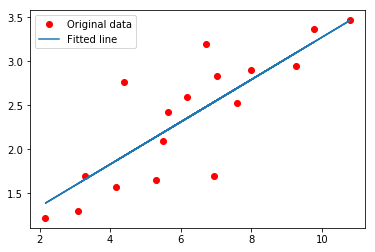

In [17]:
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if epoch % display_step == 0:
            print('Epoch: {:>4}, cost = {:.4f}, W = {:.4f}, b = {:.4f}'.format(
                epoch + 1, sess.run(cost, feed_dict={X:x, Y: y}),
                sess.run(W), sess.run(b)))

    print('Optimization Finished!')
    print('Epoch: {:>4}, cost = {:.4f}, W = {:.4f}, b = {:.4f}'.format(
        epoch + 1, sess.run(cost, feed_dict={X:x, Y: y}),
        sess.run(W), sess.run(b)))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()